# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### https://pypi.python.org/pypi/citipy

In [5]:
pip install citipy


In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
import numpy as np
import random
import requests
import json
import gmaps
import os
import datetime
import itertools
from citipy import citipy
from api_keys import weather_api_key
from scipy.stats import linregress


## Generate Cities List

In [7]:
# Save config information.
base_url =  "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

In [8]:
# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
# print log of city number (id) and city name (name)
# Latitude and longitude are a pair of numbers (coordinates) used 
# to describe a position on the plane of a geographic coordinate system. 
# The numbers are in decimal degrees format and range from -90 to 90 for latitude and -180 to 180 for longitude.

lat = np.random.uniform(-90.00,90.00, size=2000).round(2)
lng = np.random.uniform(-180.00,180.00, size=2000).round(2)

# uniq combination
combo_latlng = list(zip(lat,lng))
combo_latlng

[(51.79, 68.72),
 (-18.13, -12.1),
 (-31.63, 154.49),
 (-43.27, 139.59),
 (42.4, -177.37),
 (44.95, -67.1),
 (-84.6, -54.61),
 (-18.77, 104.03),
 (58.72, 66.2),
 (-15.66, -53.21),
 (-33.67, -172.77),
 (37.37, -32.41),
 (-26.23, 20.26),
 (19.43, 147.06),
 (6.42, 105.67),
 (-30.93, -100.35),
 (83.5, 115.1),
 (36.54, 73.26),
 (52.33, -3.26),
 (-57.87, -121.02),
 (-72.05, -40.14),
 (-37.84, -99.27),
 (-62.71, 55.34),
 (60.82, -106.54),
 (-89.27, -111.39),
 (23.77, 139.06),
 (-84.55, 145.49),
 (22.33, 9.21),
 (20.14, -40.77),
 (71.27, -6.08),
 (37.06, 29.71),
 (-13.81, 157.25),
 (83.35, 158.38),
 (41.32, -129.73),
 (-21.93, -1.77),
 (53.9, -86.48),
 (-4.14, 174.69),
 (-2.67, 82.3),
 (-72.35, -2.54),
 (16.64, -174.23),
 (-89.01, -174.72),
 (72.54, -120.65),
 (80.6, -88.53),
 (51.5, -121.91),
 (15.61, -120.6),
 (-31.23, 170.32),
 (51.89, 57.71),
 (-46.22, 75.09),
 (35.48, 150.24),
 (76.32, -62.84),
 (-15.6, -73.35),
 (-53.14, 22.18),
 (-81.68, -117.02),
 (-10.86, -155.43),
 (34.39, -124.05),


In [10]:
cityLog = []
for latlon in combo_latlng:
    city = citipy.nearest_city(latlon[0],latlon[1]).city_name
    if city not in cityLog:     
        cityLog.append(city)

# count uniq city in a list
cnt = len(cityLog)
print(f"Nubmer of cities in a list: {cnt}")


Nubmer of cities in a list: 730


In [11]:
# log the city id and name
# City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
cityid = []
cityname = []
cloudiness = []
country = []
date = []
humid = []
lat = []
lng = []
maxtemp = []
windspeed = []

for city in cityLog: 
    
    try:
        response = requests.get(f"{query_url}&q={city}").json()
        cityid.append(response['id'])
        cityname.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humid.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        cid = response['id']
        print(f"Log City ID:{cid} and City Name:{city} found! Appending stats")
    except:
        # Append null values
        print("Log City not found")
        pass
    
print("Run Completed")

Log City ID:1526038 and City Name:atbasar found! Appending stats
Log City ID:5122534 and City Name:jamestown found! Appending stats
Log City ID:2152659 and City Name:port macquarie found! Appending stats
Log City ID:5746545 and City Name:portland found! Appending stats
Log City ID:4031574 and City Name:provideniya found! Appending stats
Log City ID:4593724 and City Name:saint andrews found! Appending stats
Log City ID:3833367 and City Name:ushuaia found! Appending stats
Log City ID:2074865 and City Name:carnarvon found! Appending stats
Log City ID:1501429 and City Name:kuminskiy found! Appending stats
Log City ID:3461733 and City Name:guiratinga found! Appending stats
Log City ID:4032243 and City Name:vaini found! Appending stats
Log City ID:3372707 and City Name:ribeira grande found! Appending stats
Log City not found
Log City ID:2112309 and City Name:katsuura found! Appending stats
Log City ID:1734715 and City Name:marang found! Appending stats
Log City ID:3883457 and City Name:lebu 

Log City ID:3628473 and City Name:san cristobal found! Appending stats
Log City ID:2022572 and City Name:khatanga found! Appending stats
Log City ID:2912481 and City Name:hagenow found! Appending stats
Log City not found
Log City ID:1337617 and City Name:muli found! Appending stats
Log City ID:6165406 and City Name:thompson found! Appending stats
Log City ID:3137469 and City Name:sorland found! Appending stats
Log City ID:3421982 and City Name:maniitsoq found! Appending stats
Log City not found
Log City ID:2643044 and City Name:margate found! Appending stats
Log City ID:5563839 and City Name:fortuna found! Appending stats
Log City ID:7601762 and City Name:bairiki found! Appending stats
Log City ID:739838 and City Name:selimpasa found! Appending stats
Log City ID:3513563 and City Name:kralendijk found! Appending stats
Log City ID:3471451 and City Name:arraial do cabo found! Appending stats
Log City ID:1490256 and City Name:talnakh found! Appending stats
Log City not found
Log City ID:12

Log City ID:2084442 and City Name:vanimo found! Appending stats
Log City ID:110690 and City Name:faya found! Appending stats
Log City ID:1272473 and City Name:dod ballapur found! Appending stats
Log City ID:2126710 and City Name:beringovskiy found! Appending stats
Log City ID:1644605 and City Name:galesong found! Appending stats
Log City ID:2395170 and City Name:benin found! Appending stats
Log City ID:3460942 and City Name:itacarambi found! Appending stats
Log City ID:660561 and City Name:porvoo found! Appending stats
Log City ID:3423146 and City Name:ilulissat found! Appending stats
Log City ID:2037252 and City Name:genhe found! Appending stats
Log City ID:423549 and City Name:rumonge found! Appending stats
Log City ID:2014694 and City Name:tyrma found! Appending stats
Log City ID:3421193 and City Name:paamiut found! Appending stats
Log City ID:245785 and City Name:abeche found! Appending stats
Log City ID:3520994 and City Name:puerto escondido found! Appending stats
Log City ID:4590

Log City ID:784288 and City Name:vojka found! Appending stats
Log City ID:1496100 and City Name:ordynskoye found! Appending stats
Log City ID:116996 and City Name:sari found! Appending stats
Log City ID:934649 and City Name:cap malheureux found! Appending stats
Log City ID:1622318 and City Name:waingapu found! Appending stats
Log City not found
Log City ID:2121025 and City Name:srednekolymsk found! Appending stats
Log City not found
Log City ID:692315 and City Name:sudak found! Appending stats
Log City ID:2935022 and City Name:dresden found! Appending stats
Log City ID:3358670 and City Name:arandis found! Appending stats
Log City not found
Log City ID:336454 and City Name:ginir found! Appending stats
Log City ID:1314759 and City Name:lashio found! Appending stats
Log City not found
Log City ID:2015646 and City Name:taldan found! Appending stats
Log City ID:1735799 and City Name:sri aman found! Appending stats
Log City not found
Log City ID:1489822 and City Name:teguldet found! Appendin

Log City ID:2037799 and City Name:datong found! Appending stats
Log City ID:3480908 and City Name:la asuncion found! Appending stats
Log City ID:3174050 and City Name:mantua found! Appending stats
Log City ID:2065594 and City Name:mount isa found! Appending stats
Log City ID:1805833 and City Name:jiexiu found! Appending stats
Log City ID:5967988 and City Name:gull lake found! Appending stats
Log City ID:1733502 and City Name:ranau found! Appending stats
Log City ID:1512223 and City Name:abalak found! Appending stats
Log City ID:777682 and City Name:skjervoy found! Appending stats
Log City ID:656083 and City Name:jamsa found! Appending stats
Log City ID:1018725 and City Name:bloemfontein found! Appending stats
Log City ID:2374583 and City Name:bubaque found! Appending stats
Log City ID:2246451 and City Name:saint-louis found! Appending stats
Log City ID:1812256 and City Name:dongsheng found! Appending stats
Log City ID:2281120 and City Name:tabou found! Appending stats
Log City ID:59727

Log City ID:3401845 and City Name:conceicao do araguaia found! Appending stats
Log City ID:2334327 and City Name:kishi found! Appending stats
Log City ID:2012532 and City Name:zhigalovo found! Appending stats
Log City ID:6111862 and City Name:port hardy found! Appending stats
Log City ID:3408073 and City Name:alcantara found! Appending stats
Log City ID:6111867 and City Name:port hawkesbury found! Appending stats
Log City ID:915471 and City Name:kalabo found! Appending stats
Log City ID:1492110 and City Name:shitkino found! Appending stats
Log City ID:3537906 and City Name:santa clara found! Appending stats
Log City ID:2527087 and City Name:tiznit found! Appending stats
Log City ID:3996322 and City Name:mazatlan found! Appending stats
Log City ID:3470137 and City Name:belmonte found! Appending stats
Log City ID:3934707 and City Name:mollendo found! Appending stats
Log City ID:3420768 and City Name:qasigiannguit found! Appending stats
Log City ID:1521762 and City Name:kurchum found! App

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Create DateFrame
weather_df = pd.DataFrame ({
    "City_ID": cityid,
    "City": cityname,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date ,
    "Humidity":humid,
    "Lat":lat ,
    "Lng":lng ,
    "Max Temp":maxtemp, 
    "Wind Speed":windspeed
    
})



In [13]:
# export df to csv file
output_file = "../output_data/mycitydata.csv"
weather_df.to_csv(output_file, index = False)

In [14]:
#Display the DataFrame
weather_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,1526038,Atbasar,100,KZ,1603573864,97,51.80,68.33,32.49,23.73
1,5122534,Jamestown,90,US,1603573087,75,42.10,-79.24,44.01,8.05
2,2152659,Port Macquarie,50,AU,1603573864,99,-31.43,152.92,66.99,1.99
3,5746545,Portland,75,US,1603573076,57,45.52,-122.68,51.01,18.34
4,4031574,Provideniya,76,RU,1603573865,89,64.38,-173.30,33.82,15.21


### Inspect the data and remove the cities where the humidity > 100%.

----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#  Get the indices of cities that have humidity over 100%.
Humid = weather_df['Humidity'].max()
print (f"The max Humidity is {Humid}%.")

The max Humidity is 100%.


In [16]:
# max temp
maxtemp = weather_df['Max Temp'].max()
print(maxtemp)
# min temp
mintemp = weather_df['Max Temp'].min()
print(mintemp)

96.8
6.93


### No cities have humidity >100 %

In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [18]:
# date of analysis 
sysdate = datetime.datetime.now()
print(sysdate.strftime("%m/%d/%y"))

10/24/20


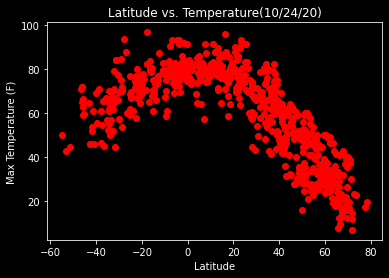

In [19]:
# plot scatter graph
#weather_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(10,8),
#              title=(f"Latitude Vs. Max Temperature Plot " + sysdate.strftime("%m/%d/%y")) )
plt.style.use("dark_background")
plt.scatter(weather_df['Lat'],weather_df['Max Temp'], marker='o', facecolors='blue', c='red')
plt.title(f'Latitude vs. Temperature(' +sysdate.strftime("%m/%d/%y") +')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("../Images/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

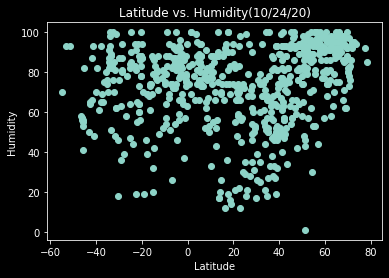

In [20]:
# graph
plt.style.use("dark_background")
plt.scatter(weather_df['Lat'],weather_df['Humidity'])
plt.title(f'Latitude vs. Humidity(' +sysdate.strftime("%m/%d/%y") +')')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("../Images/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

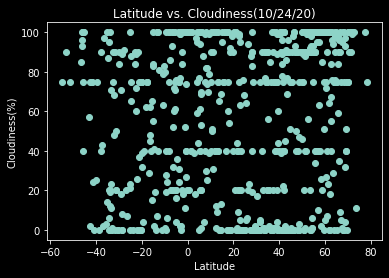

In [21]:
# graph
plt.style.use("dark_background")
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'])
plt.title(f'Latitude vs. Cloudiness(' +sysdate.strftime("%m/%d/%y") +')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig("../Images/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

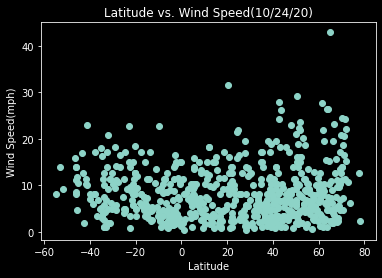

In [22]:
# graph
plt.style.use("dark_background")
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'])
plt.title(f'Latitude vs. Wind Speed(' +sysdate.strftime("%m/%d/%y") +')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig("../Images/fig4.png")
plt.show

## Linear Regression

In [23]:
north_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
south_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.95x + 92.55
R squared: 0.7697689233847984


<function matplotlib.pyplot.show(close=None, block=None)>

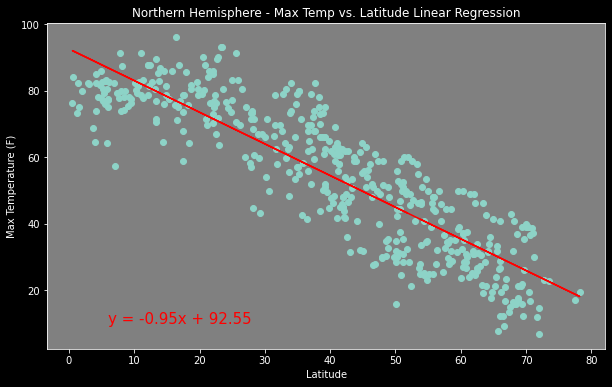

In [24]:
# Add the linear regression equation and line to plot
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("grey")
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = (f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)

# Plot regression line

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Print r square value
print(f"R squared: {rvalue**2}")

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("../Images/fig5.png")
plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.53x + 82.25
R squared: 0.47760894499796225


<function matplotlib.pyplot.show(close=None, block=None)>

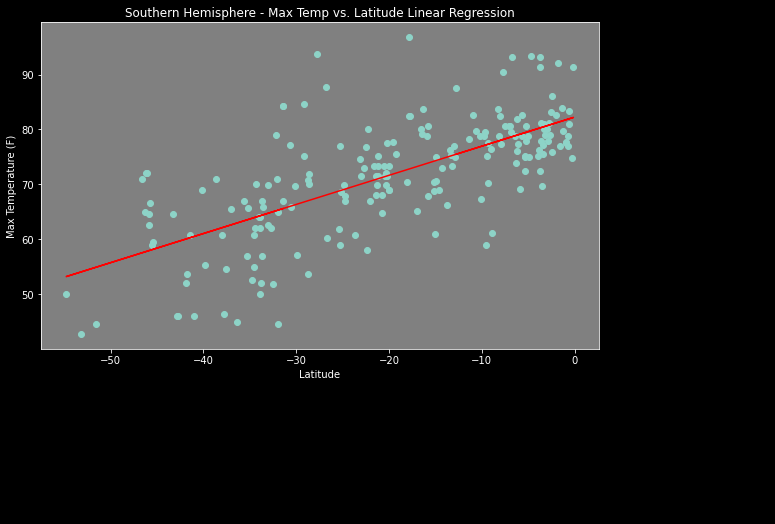

In [25]:
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("grey")
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = (f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"R squared: {rvalue**2}")

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("../Images/fig6.png")
plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.33x + 61.21
R squared: 0.09594712653066438


<function matplotlib.pyplot.show(close=None, block=None)>

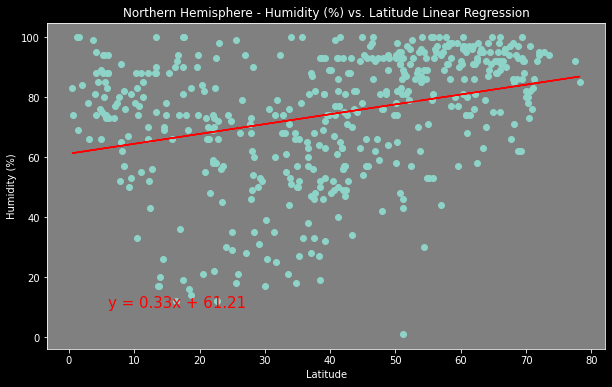

In [26]:
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("grey")
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = (f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"R squared: {rvalue**2}")

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../Images/fig7.png")
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.12x + 75.87
R squared: 0.009136053977319177


<function matplotlib.pyplot.show(close=None, block=None)>

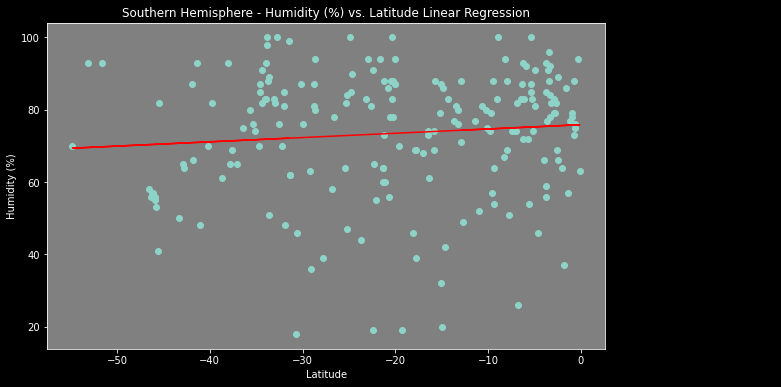

In [27]:
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("grey")
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = (f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Print r square value
print(f"R squared: {rvalue**2}")

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../Images/fig8.png")
plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.29x + 46.98
R squared: 0.021257848294864694


<function matplotlib.pyplot.show(close=None, block=None)>

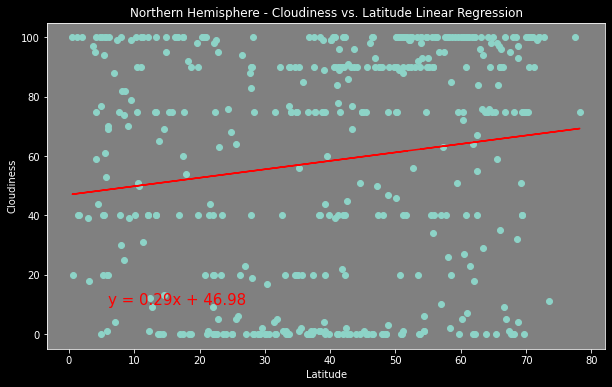

In [28]:
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("grey")
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = (f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Print r square value
print(f"R squared: {rvalue**2}")

plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../Images/fig9.png")
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.14x + 54.58
R squared: 0.0029646200617443725


<function matplotlib.pyplot.show(close=None, block=None)>

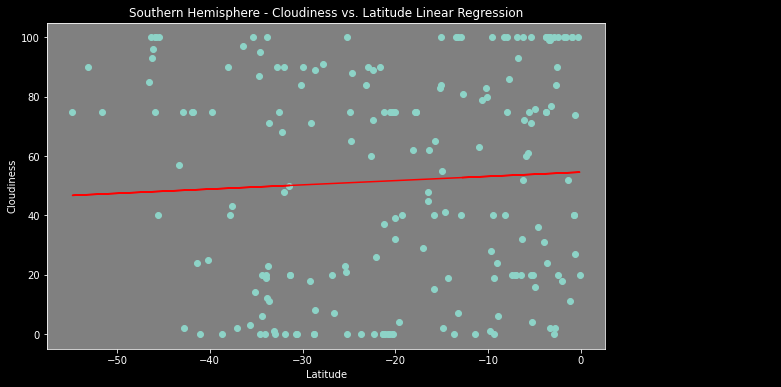

In [29]:
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("grey")
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = (f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Print r square value
print(f"R squared: {rvalue**2}")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../Images/fig10.png")
plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.04x + 6.68
R squared: 0.016622916711503406


<function matplotlib.pyplot.show(close=None, block=None)>

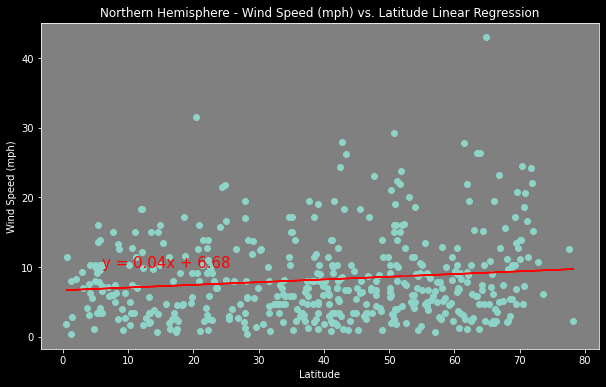

In [30]:
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("grey")
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = (f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Print r square value
print(f"R squared: {rvalue**2}")

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../Images/fig11.png")
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.09x + 6.32
R squared: 0.06368082661887582


<function matplotlib.pyplot.show(close=None, block=None)>

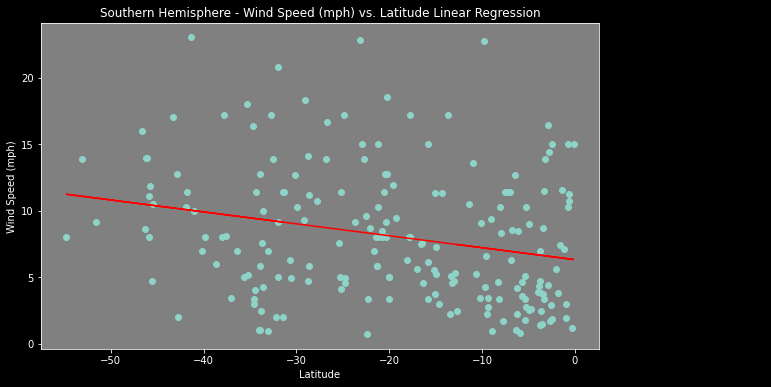

In [31]:
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("grey")
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = (f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Print r square value
print(f"R squared: {rvalue**2}")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../Images/fig12.png")
plt.show

Analysis: 
Northern Hemisphere - Max Temp vs. Latitude Linear Regression - Base on the graph, we can see that the temperture decreases 
as the latitude goes up moving away from the equator. 
Southern Hemisphere - Max Temp vs. Latitude Linear Regression - The Southern Hemisphere on the otherhand shows as we move to 
larger negative number the temperture is lower. The weather data also shows R2 is higher for Northern then Southern part. 
The graphs for Northern and Southern Hepmisphere for Humidity, Cloudiness and Wind Speed show an r square below 0.5 
which shows that they do not have a strong correlations to lattitude. 
